# **Section 1 Project**

## Project 문제 정의

### 배경

> 류재영님은 게임 회사의 데이터 팀에 합류했습니다. **다음 분기에 어떤 게임을 설계해야 할까** 라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

### 필수 조건

- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?
 - 지역은 어떻게 구분했는지 설명함
 - 지역별로 선호하는 게임의 장르를 파악함
 - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

- 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
 - 트렌드는 어떤 것을 기준으로 파악했는지 설명함
 - 연도별로 트렌드가 존재하는지 여부를 언급함
 - 왜 존재한다/존재하지 않는다고 생각했는지 설명함

- 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
 - 인기가 많다는 것을 어떻게 정의했는지 설명함
 - 해당 게임이 왜 인기가 많다고 생각했는지 설명함
 - 시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목,축이름 필수, 그 외 파라미터는 선택사항)
 - 해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함

- 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?
 - 분석에 대한 결론이 영상에서 제시됨 

### 추가 조건 (Advanced Goal)
`다음 추가 조건은 1개 이상 만족 시 3점을 받을 수 있습니다.`

- 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?
- 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?
- 제공된 데이터셋 외에 추가 데이터를 사용하였는가?
- 통계적 기법을 활용한 가설 검정을 진행하였는가?
- 완성도 높은 시각화를 보여주었는가?
 - 가독성, 목적성이 잘 드러나는 시각화


🕹️ **data description**

- `Name` : 게임의 이름입니다.
- `Platform` : 게임이 지원되는 플랫폼의 이름입니다.
- `Year` : 게임이 출시된 연도입니다.
- `Genre` : 게임의 장르입니다.
- `Publisher` : 게임을 배급한 회사입니다.
- `NA_Sales` : 북미지역에서의 출고량입니다.
- `EU_Sales` : 유럽지역에서의 출고량입니다.
- `JP_Sales` : 일본지역에서의 출고량입니다.
- `Other_Sales` : 기타지역에서의 출고량입니다.

### EDA


In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv',index_col=0)
df_copy = df.copy()
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df_copy[df_copy.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8056,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [ ]:
#중복값 확인후 제거
df_copy = df_copy.drop_duplicates()
df_copy.reset_index(drop=True,inplace=True)

In [ ]:
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df_copy.isnull().sum().to_frame()

,0
Name,0
Platform,0
Year,270
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
#1977년도의 데이터라 삭제
df_copy.drop(index=16274, axis=0, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
name_year = df_copy[df_copy.duplicated('Name',keep = False) & (df_copy['Year'].isnull())]['Name'].unique()
df_copy[df_copy['Name'].isin(name_year)].sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11640,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0,0,0.01,0
7310,AKB1/48: Idol to Guam de Koishitara...,PSP,2011.0,Misc,Namco Bandai Games,0,0,0.4,0
10895,All-Star Baseball 2005,PS2,NaN,Sports,Unknown,0.16,0.12,0,0.04
14118,All-Star Baseball 2005,XB,NaN,Sports,Unknown,0.11,0.03,0,0.01
7150,Aquaman: Battle for Atlantis,XB,NaN,Action,Unknown,0.01,0,0,0
...,...,...,...,...,...,...,...,...,...
4912,Wheel of Fortune,DS,2010.0,Misc,THQ,0.41,0,0,30K
15775,Without Warning,XB,NaN,Shooter,Capcom,0.01,0,0,0
6131,Without Warning,PS2,2005.0,Shooter,Capcom,0.02,0.01,0,0
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0


In [ ]:
publisher_year = df_copy[df_copy.duplicated('Name',keep = False) & (df_copy['Publisher'].isnull())]['Name'].unique()
df_copy[df_copy['Name'].isin(publisher_year)].sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7310,AKB1/48: Idol to Guam de Koishitara...,PSP,2011.0,Misc,Namco Bandai Games,0,0,0.4,0
11640,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,NaN,0,0,0.01,0
16066,Bound By Flame,X360,2014.0,Role-Playing,NaN,0,0.01,0,0
1118,Bound By Flame,PS4,2014.0,Role-Playing,Focus Home Interactive,0.07,0.08,0,0.04
6392,Brothers in Arms: Furious 4,X360,NaN,Shooter,NaN,0.01,0,0,0
15057,Brothers in Arms: Furious 4,PS3,2012.0,Shooter,Ubisoft,0.01,0.05,0,0.02
5901,Mario Tennis,GB,2000.0,Sports,Nintendo,0.5,0.18,0.44,0.06
15811,Mario Tennis,N64,2000.0,Sports,Nintendo,0.78,0.4,1.06M,0.07
9876,Mario Tennis,3DS,NaN,Sports,NaN,0,0,0.02,0
9895,Mario Tennis,Wii,2010.0,Sports,Nintendo,0,0.06,0,0.01


In [ ]:
genre_year = df_copy[df_copy.duplicated('Name',keep = False) & (df_copy['Genre'].isnull())]['Name'].unique()
df_copy[df_copy['Name'].isin(genre_year)].sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11355,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
16554,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01
3846,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03
1210,Back to the Future: The Game,PS3,2011.0,Adventure,Telltale Games,0.07,0.01,0,0.01
16056,Back to the Future: The Game,Wii,2011.0,Adventure,Telltale Games,0.05,0,0,0
...,...,...,...,...,...,...,...,...,...
16210,The Mummy: Tomb of the Dragon Emperor,PS2,2008.0,Action,Vivendi Games,0.12,0.1,0,0.03
12772,The Mummy: Tomb of the Dragon Emperor,DS,2008.0,Action,Vivendi Games,0.08,0,0,0.01
11002,Time Travelers,PSP,2012.0,Adventure,Level 5,0,0,0.01,0
12234,Time Travelers,3DS,2012.0,Adventure,Unknown,0,0,0.04,0


In [ ]:
data_columns = ['Year','Publisher','Genre']

for col in data_columns:
  #중복된 Name에 'Year','Publisher','Genre'컬럼이 nan인 경우
  dn = df_copy[df_copy.duplicated('Name') & df_copy[col].isnull()]

  #같은 Name의 'Year','Publisher','Genre' 값을 가져와서 대체하기
  for name in dn['Name'].unique():
    value = df_copy.loc[df_copy['Name']==name,col].dropna().sort_values(ascending = False)
    value_fvi = value.first_valid_index()
    if value_fvi is not None:
      result = df_copy.loc[value_fvi, col]
      df_copy.loc[(df_copy['Name'] == name) & df_copy[col].isnull(), col] = result

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_copy.isnull().sum().to_frame() #결측치 확인

,0
Name,0
Platform,0
Year,181
Genre,38
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df_copy.dropna(subset=['Year','Genre','Publisher'], inplace=True)
df_copy.isnull().sum().to_frame()

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df_copy.Year.describe().to_frame()

,Year
count,16342.000000
mean,1994.260556
std,155.006914
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [ ]:
df_copy.query("Year<=9")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
1015,Wolfenstein,PC,9.0,Shooter,Activision,0.01,0.03,0,0.01
1220,Ratchet & Clank: Going Commando,PS2,3.0,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1364,LEGO Star Wars II: The Original Trilogy,PS2,6.0,Action,LucasArts,1.85,0.64,0.01,0.19
1409,Rogue Warrior,PS3,9.0,Shooter,Bethesda Softworks,0.11,0.02,0,0.01
1684,SpongeBob SquarePants featuring Nicktoons: Glo...,PS2,8.0,Action,THQ,0.29,0.22,0,0.07
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
2454,SOCOM: U.S. Navy SEALs Fireteam Bravo 2,PSP,6.0,Shooter,Sony Computer Entertainment,0.81,0.11,0,0.13
2467,Splat Renegade Paintball,XB,5.0,Sports,Take-Two Interactive,0.04,0.01,0,0


In [ ]:
df_copy.query("Year<=23")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
1015,Wolfenstein,PC,9.0,Shooter,Activision,0.01,0.03,0,0.01
...,...,...,...,...,...,...,...,...,...
15611,Rally Fusion: Race of Champions,PS2,2.0,Racing,Activision,0.06,0.05,0,0.02
15835,Theatrhythm Dragon Quest,3DS,15.0,Misc,Square Enix,0,0,0.15,0
16102,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16148,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05


In [ ]:
df_copy.query("(Year>23) & (Year<100)")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96.0,Racing,ASCII Entertainment,0,0,0.9,0
2429,Casper,PS,96.0,Adventure,Interplay,0.46,0.31,0,0.05
3492,Glover,N64,98.0,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4365,Adventure Island,NES,86.0,Platform,Hudson Soft,0,0,1.05,0
4807,Virtua Cop,SAT,95.0,Shooter,Sega,0,0,0.62,0
4839,Mobile Suit Gundam,PS,95.0,Action,Namco Bandai Games,0,0,0.42,0.03
10314,AeroFighters Assault,N64,97.0,Action,Video System,0.15,0.04,0,0
10704,3D Baseball,PS,96.0,Sports,BMG Interactive Entertainment,0.02,0.01,0,0
11333,Super Fire ProWrestling X,SNES,95.0,Fighting,Human Entertainment,0,0,0.28,0


In [ ]:
#소수점을 없애기 위해 int로 바꾼다음 앞에 숫자 추가를 위해 str 바꿔줍니다
df_copy.Year = df_copy.Year.astype(int).astype(str)

#data<=9인 값은 200을 앞에 추가
df_copy.loc[df_copy['Year'].astype(int)<=9, 'Year'] = '200' + df_copy.loc[df_copy['Year'].astype(int)<=9, 'Year'].astype(str)
#data<=23인 값은 20을 앞에 추가
df_copy.loc[df_copy['Year'].astype(int)<=23, 'Year'] = '20' + df_copy.loc[df_copy['Year'].astype(int)<=23, 'Year'].astype(str)
#23<data<100인 값은 19를 앞에 추가
df_copy.loc[(df_copy['Year'].astype(int)>23)&(df_copy['Year'].astype(int)<100), 'Year'] = '19' + df_copy.loc[(df_copy['Year'].astype(int)>23)&(df_copy['Year'].astype(int)<100), 'Year'].astype(str)

#마지막엔 int로 타입 변환
df_copy.Year = df_copy.Year.astype(int)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df_copy.reset_index(drop=True,inplace=True)
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16337,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16338,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16339,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16340,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
#2중 for문으로 제곱수의 
'''sales = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for sal_name in sales:
  for i, value in enumerate(df_copy[sal_name]):
    if value[-1] == 'M':
      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000000
    elif value[-1] == 'K':
      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000
    else:
      df_copy.loc[i, sal_name] = float(value) * 1000000'''

"sales = ['NA_Sales',\t'EU_Sales',\t'JP_Sales',\t'Other_Sales']\nfor sal_name in sales:\n  for i, value in enumerate(df_copy[sal_name]):\n    if value[-1] == 'M':\n      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000000\n    elif value[-1] == 'K':\n      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000\n    else:\n      df_copy.loc[i, sal_name] = float(value) * 1000000"

In [ ]:
df_copy[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sample(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8247,0.19,0.01,0,0.01
5999,0,0,0.28,0.01
11627,0.02,0.01,0,0
5043,0.06,0.01,0,0.01
1371,0.04,0.03,0,0.01
8587,0.41,0.15,0,0.01
7352,0.02,0.02,0,0
8254,0.12,0.09,0,0.03
9558,0.06,0.05,0,0.02
4013,0.09,0.07,0,0.02


In [ ]:
#M과 K의 단위를 다 같은 단위로 다 맞춰줬습니다
def value(sale):
  if sale[-1] == 'M':
    return float(sale[:-1]) * 1000000
  elif sale[-1] == 'K':
    return float(sale[:-1]) * 1000
  else:
    return float(sale) * 1000000

sales = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for i in sales:
  df_copy[i] = df_copy[i].apply(value)

<ipython-input-22-4eb94566149b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i] = df_copy[i].apply(value)


In [ ]:
df_copy.iloc[:,-4:] = df_copy.iloc[:,-4:].astype(int)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


### 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?
 - 지역은 어떻게 구분했는지 설명함
 - 지역별로 선호하는 게임의 장르를 파악함
 - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

In [ ]:
df_m=df_copy[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].copy()
id_vars = df_m.columns[:1]
Genre_sales = pd.melt(df_m, id_vars=id_vars,var_name='Region', value_name='Sales')
Genre_sales

,Genre,Region,Sales
0,Action,NA_Sales,40000
1,Action,NA_Sales,170000
2,Adventure,NA_Sales,0
3,Misc,NA_Sales,40000
4,Platform,NA_Sales,120000
...,...,...,...
65363,Platform,Other_Sales,10000
65364,Action,Other_Sales,0
65365,Sports,Other_Sales,130000
65366,Action,Other_Sales,30000


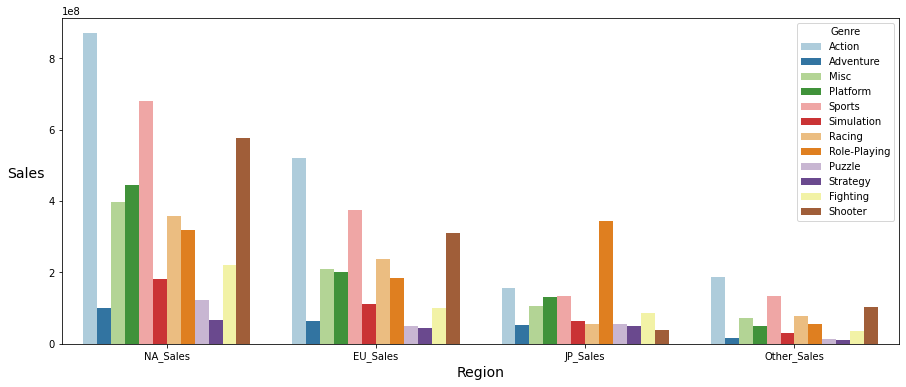

In [ ]:
plt.figure(figsize=(15, 6))

sns.set_palette('Paired')
sns.barplot(data = Genre_sales,x='Region',y='Sales',hue='Genre',estimator=sum,ci=0)
plt.xlabel('Region',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

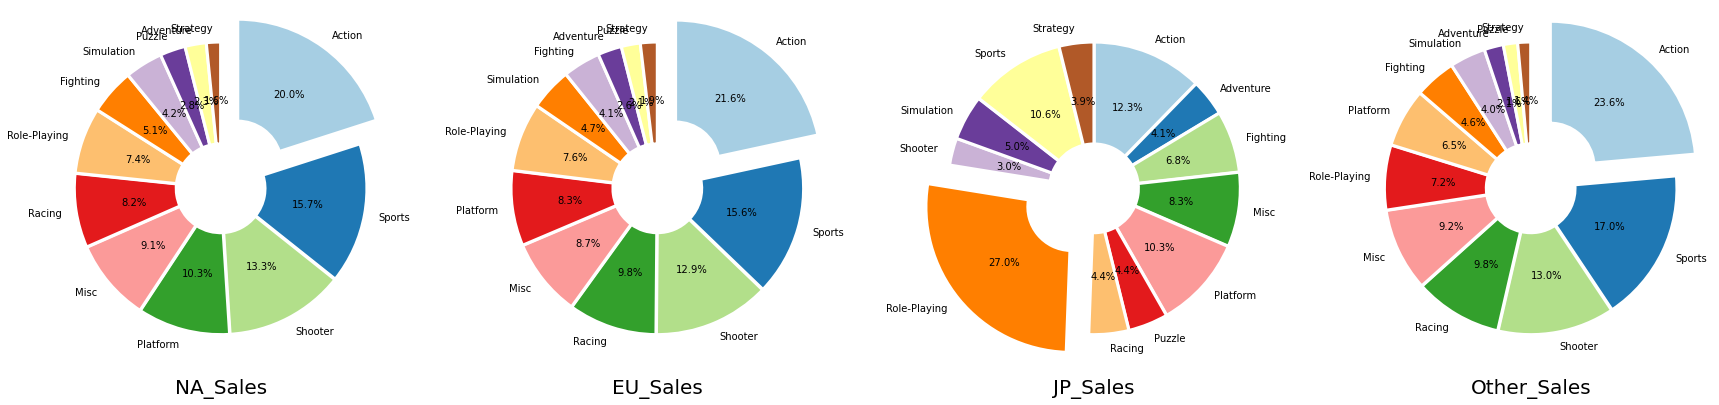

In [ ]:
# 지역별로 장르의 총 판매량 계산
na_genre_sales = df_copy.groupby('Genre')['NA_Sales'].sum().sort_values(ascending = False)
eu_genre_sales = df_copy.groupby('Genre')['EU_Sales'].sum().sort_values(ascending = False)
jp_genre_sales = df_copy.groupby('Genre')['JP_Sales'].sum()
other_genre_sales = df_copy.groupby('Genre')['Other_Sales'].sum().sort_values(ascending = False)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 10))

explode,JP_explode = [ 0.005 for _ in range(12)],[ 0.005 for _ in range(12)]
explode[0] = 0.2
JP_explode[7] = 0.2

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax1.pie(na_genre_sales, labels=na_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=explode,wedgeprops=wedgeprops)
ax2.pie(eu_genre_sales, labels=eu_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=explode,wedgeprops=wedgeprops)
ax3.pie(jp_genre_sales, labels=jp_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=JP_explode,wedgeprops=wedgeprops)
ax4.pie(other_genre_sales, labels=other_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=explode,wedgeprops=wedgeprops)
ax1.set_xlabel('NA_Sales',fontsize=20)
ax2.set_xlabel('EU_Sales',fontsize=20)
ax3.set_xlabel('JP_Sales',fontsize=20)
ax4.set_xlabel('Other_Sales',fontsize=20)
plt.show()

In [ ]:
#가설검정
#지역별로 선호하는 게임의 장르가 같다
#지역별로 선호하는 게임의 장르가 다르다
import scipy

not_jp = na_genre_sales + eu_genre_sales + other_genre_sales
jp = jp_genre_sales

pv1=scipy.stats.ttest_ind(not_jp,jp,equal_var=True).pvalue
pv1
#pvalue가 0.05보다 작으므로 대립가설인 지역별로 선호하는 게임의 장르가 다르다가 채택됩니다.

0.0006088866654925902

In [ ]:
select=df_copy.groupby('Genre')[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum()
select

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,869129997,520559997,156610000,186169998
Adventure,101790000,63700000,51920000,16700000
Fighting,220429998,99900000,87140000,36160000
Misc,396479999,208680000,105200000,72859999
Platform,445469999,200639999,130529999,51460000
Puzzle,122169999,50520000,56240000,12490000
Racing,357199997,236809999,56330000,76930000
Role-Playing,318759999,183099998,343219999,56770000
Shooter,576819997,311699996,38190000,102270000


In [ ]:
pv2=scipy.stats.chi2_contingency(select).pvalue
pv2
#카이제곱 검정을 해보아도 똑같이 대립가설인 지역별로 선호하는 게임의 장르가 다르다가 채택됩니다.

0.0

북미,유럽,그외 세 지역 모두는 **액션,스포츠,슈팅** 게임의 지표가 각각 약 **20%,15%,13%**로 비슷한 판매율을 나타냅니다. 하지만 **일본**에서 만큼은 **RPG게임**의 판매율이 **27%**로 압도적인 판매율을 기록하고 액션과 스포츠는 타국가에 비하여 낮은 지표를 기록

### 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
 - 트렌드는 어떤 것을 기준으로 파악했는지 설명함
 - 연도별로 트렌드가 존재하는지 여부를 언급함
 - 왜 존재한다/존재하지 않는다고 생각했는지 설명함

In [ ]:
df_copy.Year.describe().to_frame()

,Year
count,16342.000000
mean,2006.413291
std,5.825348
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


.describe()와 박스플롯 중 어느걸로 사분위수를 맞춰야하지?

In [ ]:
#년도의 4분위수로 나눈 장르별 판매량을 보려고 해당 컬럼만 가져옴
df_m=df_copy[['Year','Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].copy()
id_vars = df_m.columns[:2]
total_sales = pd.melt(df_m, id_vars=id_vars,var_name='Region', value_name='Sales')
total_sales

,Year,Genre,Region,Sales
0,2008,Action,NA_Sales,40000
1,2009,Action,NA_Sales,170000
2,2010,Adventure,NA_Sales,0
3,2010,Misc,NA_Sales,40000
4,2010,Platform,NA_Sales,120000
...,...,...,...,...
65363,2006,Platform,Other_Sales,10000
65364,2005,Action,Other_Sales,0
65365,2015,Sports,Other_Sales,130000
65366,2013,Action,Other_Sales,30000


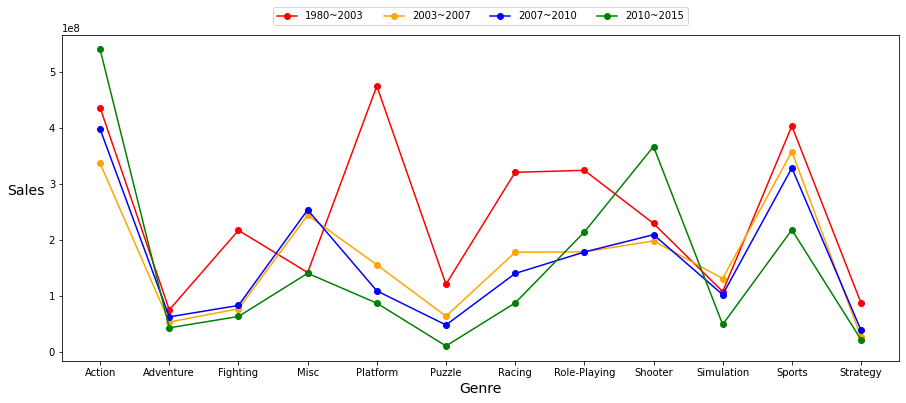

In [ ]:
year_sales1 = total_sales.query("(1980<Year) & (Year<=2003)").groupby('Genre')['Sales'].sum()
year_sales2 = total_sales.query("(2003<Year) & (Year<=2007)").groupby('Genre')['Sales'].sum()
year_sales3 = total_sales.query("(2007<Year) & (Year<=2010)").groupby('Genre')['Sales'].sum()
year_sales4 = total_sales.query("(2010<Year) & (Year<=2015)").groupby('Genre')['Sales'].sum()

plt.figure(figsize=(15, 6))
plt.plot(year_sales1.index, year_sales1, marker='o', label='1980~2003',color='red')
plt.plot(year_sales2.index, year_sales2, marker='o', label='2003~2007',color='orange')
plt.plot(year_sales3.index, year_sales3, marker='o', label='2007~2010',color='Blue')
plt.plot(year_sales4.index, year_sales4, marker='o', label='2010~2015',color='green')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

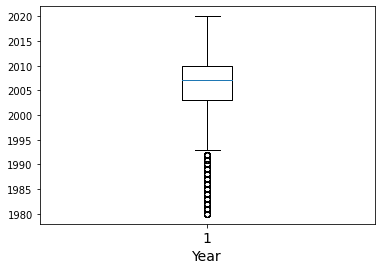

In [ ]:
plt.boxplot(df_copy['Year'])
plt.xticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

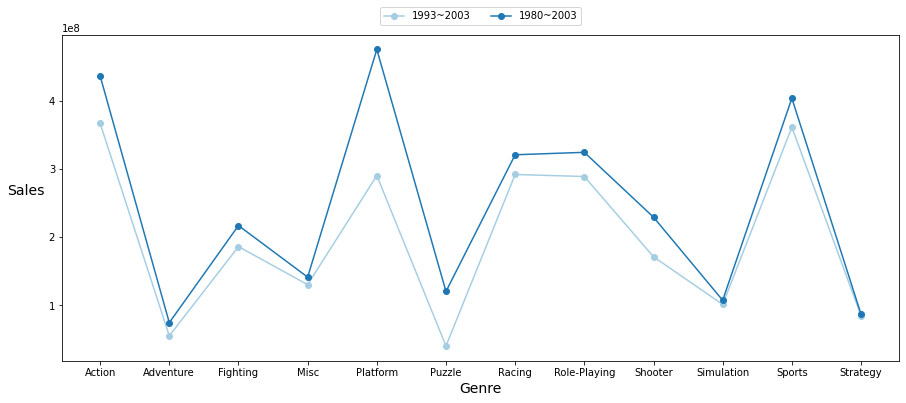

In [ ]:
year_sales1 = total_sales.query("(1993<Year) & (Year<=2003)").groupby('Genre')['Sales'].sum()
year_sales2 = total_sales.query("(1980<Year) & (Year<=2003)").groupby('Genre')['Sales'].sum()

plt.figure(figsize=(15, 6))
plt.plot(year_sales1.index, year_sales1, marker='o', label='1993~2003')
plt.plot(year_sales2.index, year_sales2, marker='o', label='1980~2003')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

박스플롯으로 사분위수를 나눌경우 **마리오 게임**의 기록이 삭제되면서 Platform 장르에 큰 영향을 끼쳐 **디스크라이브**의 사분위수인 1980부터로 나누었습니다.

In [ ]:
df_m=df_copy[['Platform','Year','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].copy()
id_vars = df_m.columns[:2]
Platform_sales = pd.melt(df_m, id_vars=id_vars,var_name='Region', value_name='Sales').query('Year>=2000')
Platform_sales

,Platform,Year,Region,Sales
0,DS,2008,NA_Sales,40000
1,Wii,2009,NA_Sales,170000
2,PSP,2010,NA_Sales,0
3,DS,2010,NA_Sales,40000
4,PS3,2010,NA_Sales,120000
...,...,...,...,...
65362,PSP,2007,Other_Sales,0
65363,GC,2006,Other_Sales,10000
65364,PSP,2005,Other_Sales,0
65365,PS3,2015,Other_Sales,130000


In [ ]:
# Platform_sales에서 Sales 합계를 구하고 내림차순으로 정렬하여 상위 4개 Platform을 선택
top_platforms = Platform_sales.groupby('Platform')['Sales'].sum().nlargest(4).index.tolist()

# 상위 4개 Platform에 해당하는 데이터만 필터링하여 새로운 데이터프레임 생성
top4_platform_sales = Platform_sales[Platform_sales['Platform'].isin(top_platforms)].query("Year<2016")
top4_platform_sales

,Platform,Year,Region,Sales
1,Wii,2009,NA_Sales,170000
4,PS3,2010,NA_Sales,120000
8,PS3,2007,NA_Sales,0
9,PS3,2011,NA_Sales,40000
15,PS3,2009,NA_Sales,140000
...,...,...,...,...
65353,Wii,2009,Other_Sales,130000
65358,PS3,2011,Other_Sales,30000
65360,PS3,2010,Other_Sales,0
65361,PS2,2004,Other_Sales,80000


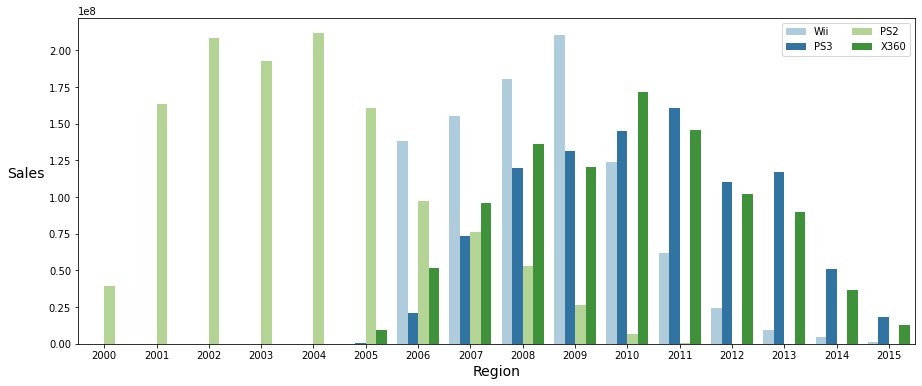

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(data = top4_platform_sales,x='Year',y='Sales',hue='Platform',estimator=sum,ci=0,palette='Paired')
plt.legend(ncol=2)
plt.xlabel('Region',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

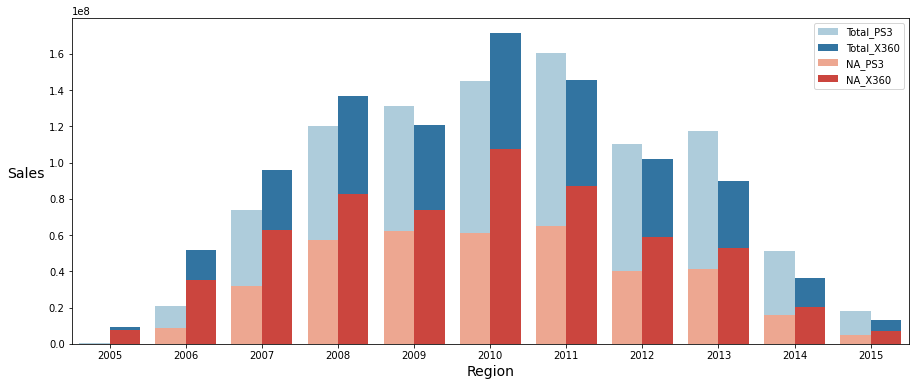

In [ ]:
plt.figure(figsize=(15, 6))
total_ps3_x360 = top4_platform_sales.query("(Platform == 'PS3') | (Platform == 'X360')")
na_ps3_x360 = total_ps3_x360[total_ps3_x360['Region']=='NA_Sales']

sns.barplot(data = total_ps3_x360,x='Year',y='Sales',hue='Platform',estimator=sum,ci=0,palette='Paired')
sns.barplot(data = na_ps3_x360,x='Year',y='Sales',hue='Platform',estimator=sum,ci=0,palette='Reds')
legend = plt.legend()
legend.texts[0].set_text('Total_PS3')
legend.texts[1].set_text('Total_X360')
legend.texts[2].set_text('NA_PS3')
legend.texts[3].set_text('NA_X360')
plt.xlabel('Region',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

**년도별 트랜드는 장르와 플랫폼 모두 다르다**

### 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?
 - 분석에 대한 결론이 영상에서 제시됨 

In [ ]:
total_genre_sales = total_sales.query("Year<=2015")
total_genre_sales = total_genre_sales.set_index('Year')
total_genre_sales.index = pd.to_datetime(total_genre_sales.index, format='%Y')

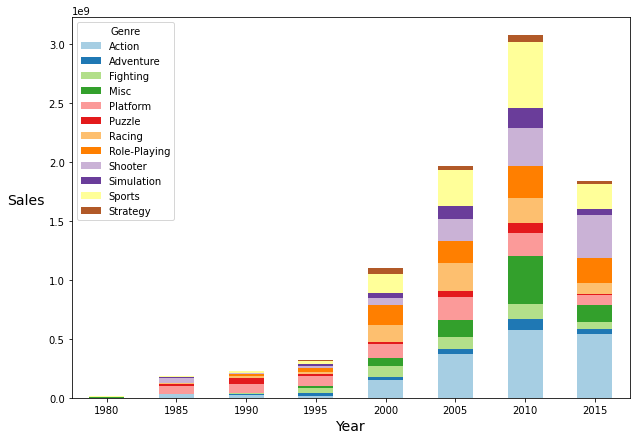

In [ ]:
sns.set_palette('Paired')

df_pivot = pd.pivot_table(total_genre_sales, index = pd.Grouper(freq='5Y'), columns = 'Genre', values='Sales',aggfunc='sum')
xname = df_pivot.plot.bar(stacked=True, figsize=(10,7))

name = []
for i in range(len(df_pivot)):
  name.append(str(df_pivot.index[i])[:4])

xname.set_xticklabels(name,rotation=0)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

In [ ]:
year_2000_2005 = total_genre_sales.query("(Year>=2000) & (Year<2005)").groupby('Genre')['Sales'].sum().nlargest(4)
year_2005_2010 = total_genre_sales.query("(Year>=2005) & (Year<2010)").groupby('Genre')['Sales'].sum().nlargest(4)
year_2010_2015 = total_genre_sales.query("(Year>=2010) & (Year<2015)").groupby('Genre')['Sales'].sum().nlargest(4)
year_2015 = total_genre_sales.query("(Year>=2015) & (Year<2016)").groupby('Genre')['Sales'].sum().nlargest(4)

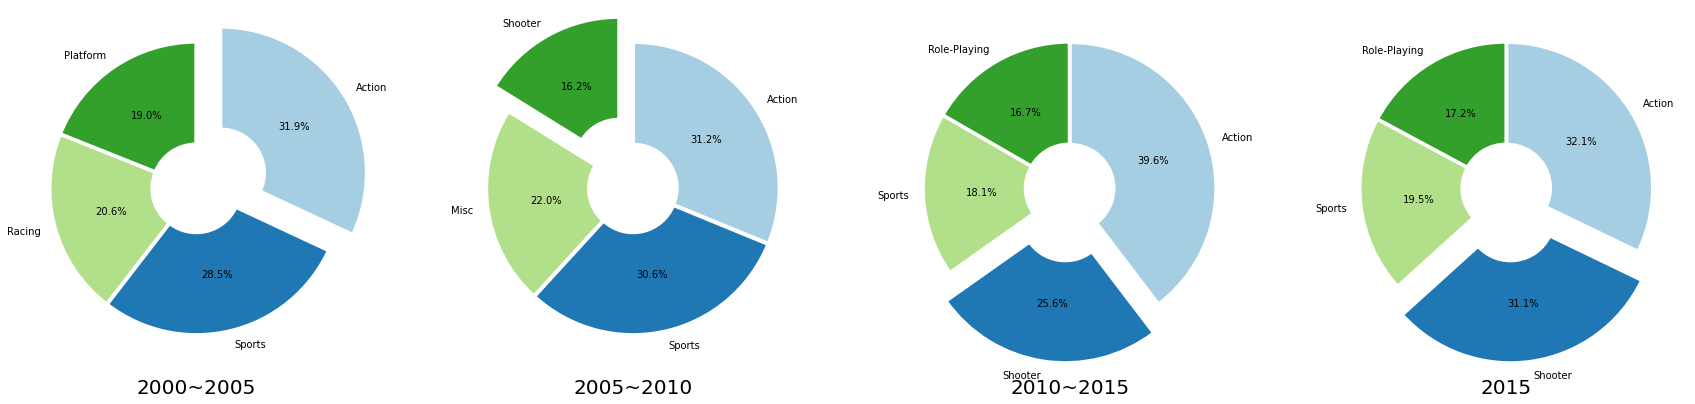

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 10))

explode = [ 0.005 for _ in range(4)]

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
explode = [ 0.005 for _ in range(4)]
explode[0] = 0.2
ax1.pie(year_2000_2005, labels=year_2000_2005.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=explode,wedgeprops=wedgeprops)
explode = [ 0.005 for _ in range(4)]
explode[3] = 0.2
ax2.pie(year_2005_2010, labels=year_2005_2010.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=explode,wedgeprops=wedgeprops)
explode = [ 0.005 for _ in range(4)]
explode[1] = 0.2
ax3.pie(year_2010_2015, labels=year_2010_2015.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=explode,wedgeprops=wedgeprops)
explode = [ 0.005 for _ in range(4)]
explode[1] = 0.2
ax4.pie(year_2015, labels=year_2015.index, autopct='%.1f%%', startangle=90,counterclock=False,explode=explode,wedgeprops=wedgeprops)
ax1.set_xlabel('2000~2005',fontsize=20)
ax2.set_xlabel('2005~2010',fontsize=20)
ax3.set_xlabel('2010~2015',fontsize=20)
ax4.set_xlabel('2015',fontsize=20)
plt.show()

In [ ]:
shooter_sales = total_sales[(total_sales['Genre']=='Shooter')& (total_sales['Year'] < 2015)].groupby('Year')['Sales'].sum()

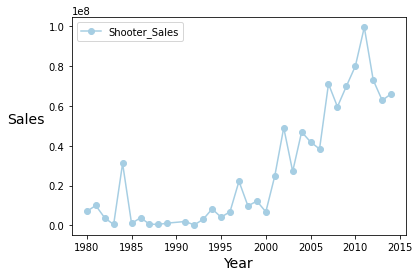

In [ ]:
plt.plot(shooter_sales.index, shooter_sales, marker='o',label='Shooter_Sales')
plt.legend()
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

액션게임이 판매량이 가장 큰 지표이지만, 액션게임은 시장이 큰 만큼 경쟁이 심할 것 이라 판된되어, 과거부터 현재 2015년까지 **슈팅게임**의 판매량이
**상승 그래프**이기 때문에 다음 분기 출시 예정 게임은 **슈팅게임**으로 결정했습니다

In [ ]:
#히스토그램으로도 나타내보았지만 작은 값들이 안보여져서 고민을 해보았습니다.
'''plt.figure(figsize=(15, 6))

sns.set_palette('Paired')

for name in total_sales['Genre'].unique():
  Genre_Year = total_sales.loc[total_sales['Genre'] == name].groupby('Year')['Sales'].sum()
  index = Genre_Year.index
  value = Genre_Year.values
  plt.hist(index, weights=value,label=name)
  
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.93,1))
plt.show()'''

"plt.figure(figsize=(15, 6))\n\nsns.set_palette('Paired')\n\nfor name in total_sales['Genre'].unique():\n  Genre_Year = total_sales.loc[total_sales['Genre'] == name].groupby('Year')['Sales'].sum()\n  index = Genre_Year.index\n  value = Genre_Year.values\n  plt.hist(index, weights=value,label=name)\n  \nplt.xlabel('Year',fontsize=14)\nplt.ylabel('Sales',rotation=0, ha='right',fontsize=14)\nplt.legend(loc='upper center', bbox_to_anchor=(0.93,1))\nplt.show()"